In [1]:
# THIS IS ACTUALLY A CLASSIFICATION

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def g(z):
    return 1/(1+(np.exp(-1*z))) #Sigmoid

In [4]:
g(0.9)

0.7109495026250039

In [5]:
m1,cov1=np.array([1,5]), np.array([[1,0.1],[0.1,1]])
m2,cov2=np.array([4.5,2]), np.array([[1,0.1],[0.1,1.2]])

dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)

print(dist1.shape,dist2.shape)

(500, 2) (500, 2)


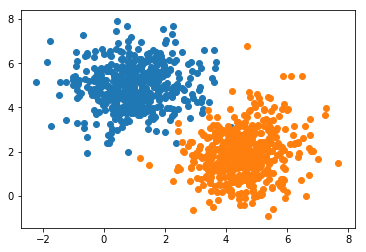

In [6]:
plt.scatter(dist1[:,0], dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
plt.show()

In [7]:
data=np.zeros((1000,3))
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,-1] = 1
print(data.shape)

(1000, 3)


In [8]:
np.random.shuffle(data)

split=int(0.7*1000)

X_train=data[:split,:2]
X_test=data[split:,:2]
y_train=data[:split,-1]
y_test=data[split:,-1]

In [9]:
def h(X,Theta,c): #c is theta0, i.e- the bias
    h = (X*Theta).sum() + c
    return g(h)


In [10]:
def log_likelihood(X,W,c,y_true): #Binary Cross-Entropy
    total=0.0
    m=X.shape[0]
    for i in range(m):
        if y_true[i]==0:
            total += np.log(1-h(X[i],W,c)) #For classification 0
        else:
            total += np.log(h(X[i],W,c)) #For classification 1
    total/=m
    return total

In [11]:
def gradient_ascent(X,W,c,y_true,learning_rate=0.1):
    grad_W=np.zeros((W.shape[0]))
    grad_c=0.0
    
    m=X.shape[0]
    for i in range(m):
        grad_W += (y_true[i]-h(X[i],W,c)) * X[i]
        grad_c += (y_true[i]-h(X[i],W,c)) * 1
    grad_W /= m
    grad_c /= m
    
    W += learning_rate * grad_W
    c += learning_rate * grad_c
    
    l = log_likelihood(X,W,c,y_true)
    return W,c,l

In [12]:
W=np.array([0.5,0.5])
bias=4.2
log_like=[]
for i in range(200):
    W,c,l = gradient_ascent(X_train,W,bias,y_train)
    log_like.append(l)
print(c)
print(W)
print(log_like[-1])

4.1993903000114265
[ 1.26849521 -2.13606589]
-0.04435348714751272


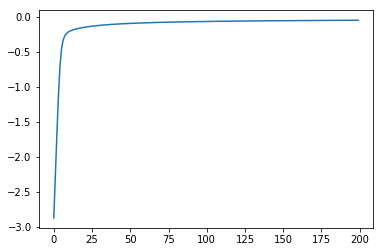

In [13]:
plt.plot(log_like)
plt.show()

In [14]:
def predict(x_sample,W,c):
    confidence = h(x_sample,W,c)
    if(confidence>0.5):
        return 1
    else:
        return 0

In [15]:
def score(X_test, y_test, W,c):
    predictions=[]
    m=X_test.shape[0]
    for i in range(m):
        p=predict(X_test[i],W,c)
        predictions.append(p)
    predictions = np.asarray(predictions)
    return 100 * (predictions==y_test).sum() / m

In [16]:
score(X_test, y_test, W,c)

99.0

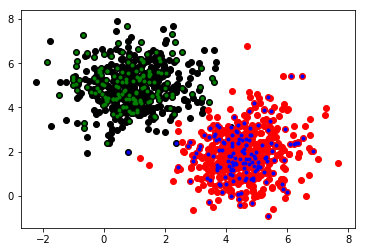

In [22]:
plt.scatter(dist1[:,0], dist1[:,1],color='black')
plt.scatter(dist2[:,0],dist2[:,1],color='r')
m=X_test.shape[0]
for i in range(m):
    p=predict(X_test[i],W,c)
    if p==1:
        plt.plot(X_test[i][0],X_test[i][1],'b.')
    else:
        plt.plot(X_test[i][0],X_test[i][1],'g.')
plt.show()